In [104]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from enum import Enum
from dotenv import load_dotenv
import matplotlib.pyplot as plt


In [105]:
df = pd.read_csv('./processed/missing_value_handled.csv')

In [106]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_adoption_score
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [107]:
categorical_columns= ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' ]
numerical_columns = [ 'tenure', 'MonthlyCharges', 'TotalCharges']

In [108]:
# Example: Convert 'TotalCharges' column from string to float, then to int (if possible)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(int)

Distribution plots

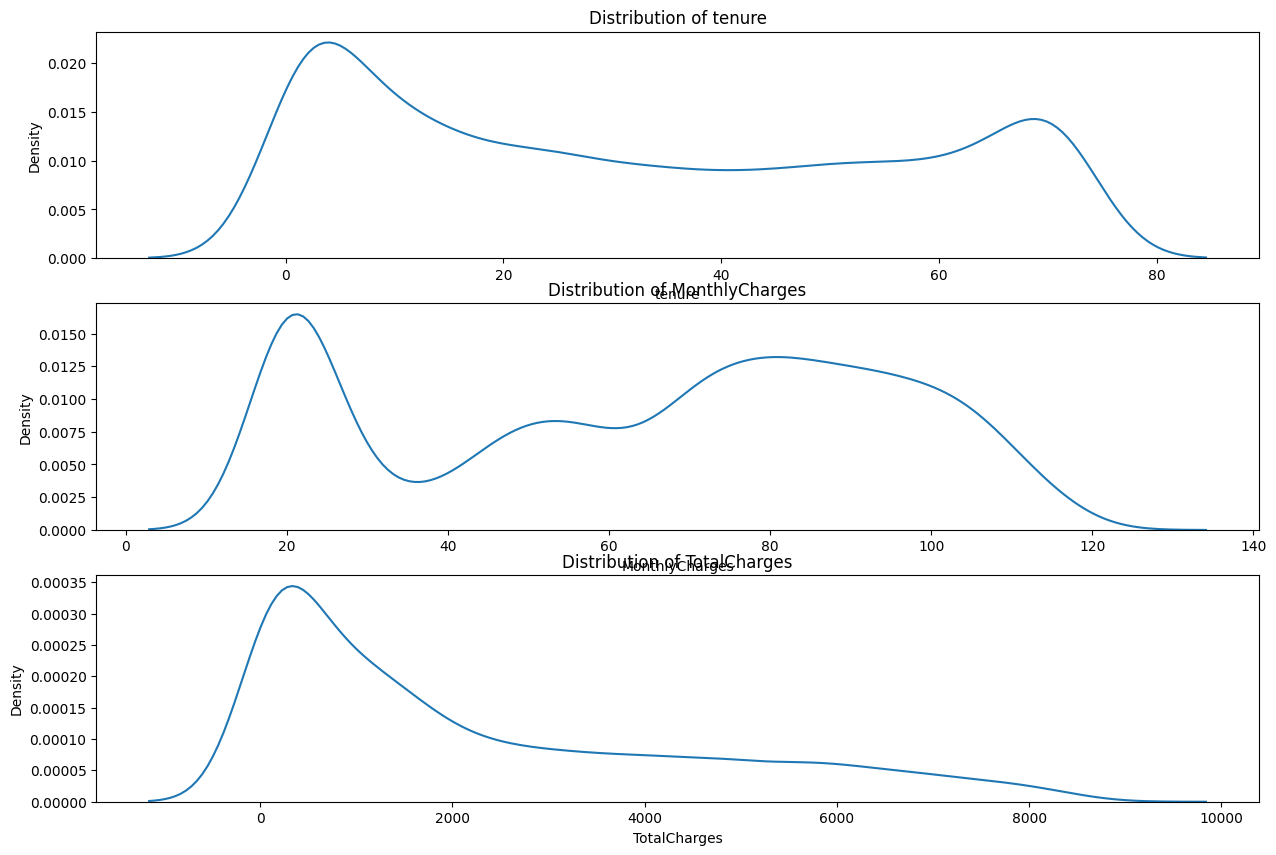

In [109]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data = df[col], ax = axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.show()

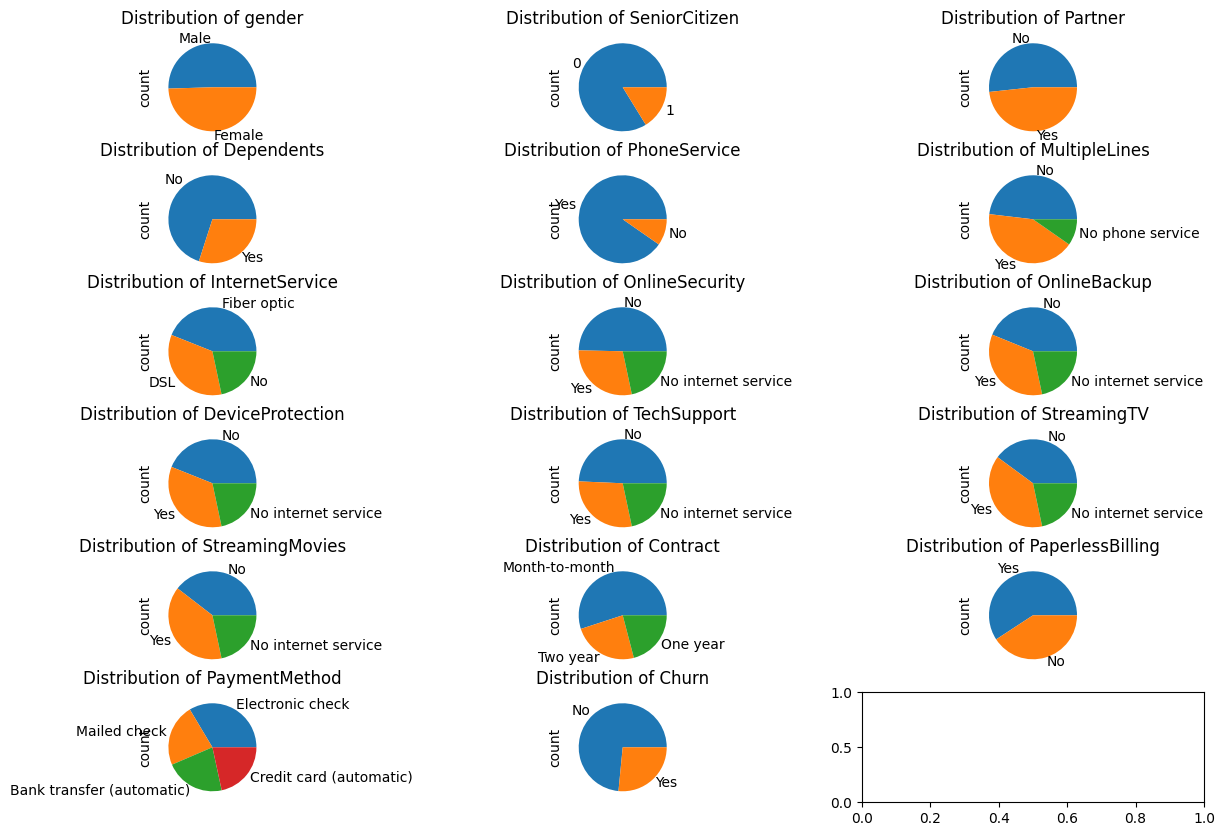

In [110]:
fig, axes = plt.subplots(ncols=3, nrows= 6, figsize=(15,10))
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='pie', ax =axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.show()

Boxplots

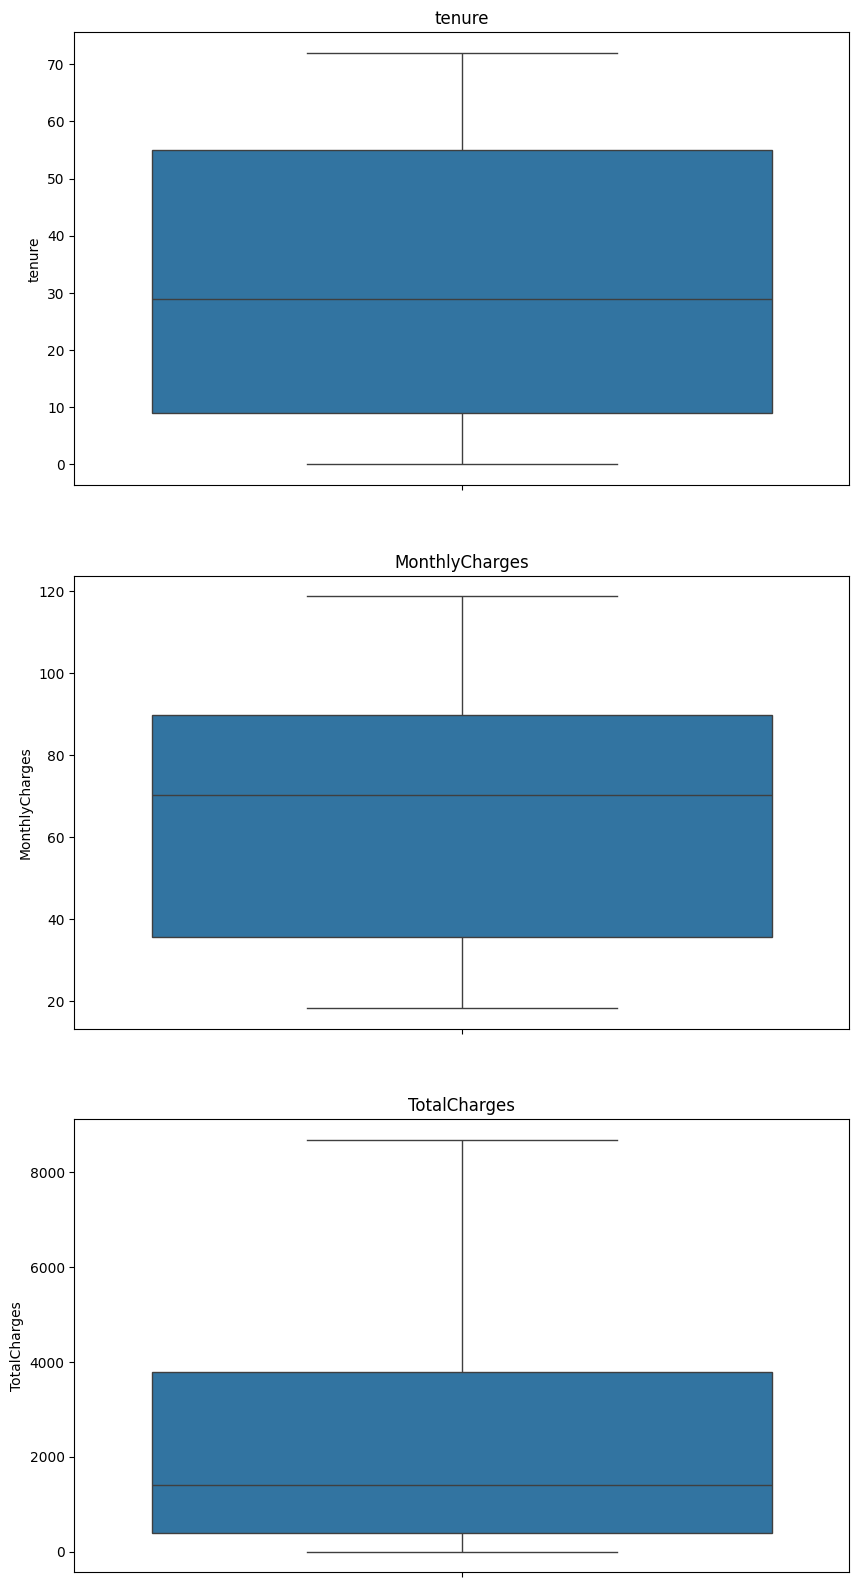

In [111]:
fig, axes = plt.subplots(3, 1, figsize=(10,20))
axes = axes.flatten()

for id, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], ax= axes[id])
    axes[id].set_title(col)

plt.show()

IQR method

In [112]:
def find_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    iqr = q3 - q1

    return (data < q1 - 1.5* iqr) | (data > q3 + 1.5*iqr)

for col in numerical_columns:
    anomalies = find_iqr(df[col]).sum()
    print(f'Anomalies in {col} using IQR: {anomalies}')

Anomalies in tenure using IQR: 0
Anomalies in MonthlyCharges using IQR: 0
Anomalies in TotalCharges using IQR: 0


- Seems no outliers, but I think raws with 0 tenure should be droped

In [113]:
for idx, x in enumerate(df['tenure']):
    if x == 0:
        df = df.drop(index=idx)

for idx, x in enumerate(df['TotalCharges']):
    if x == 0:
        print(idx)

In [114]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,service_adoption_score
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889,No,3
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108,Yes,3
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990,No,7
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362,No,6
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306,Yes,2


In [115]:
df.to_csv('./processed/outlier_handled.csv', index=False)